Career Results by Race

- plot cumulative podiums/wins by race
- a test to see if Verstappen's stats are remarkable
- and see if "VER will not be one of the top drivers of all time when he retires" is truly "the coldest WTF1 take"

In [1]:
##IMPORTS + CACHE

import fastf1 as ff1
import datetime
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

from PIL import Image
import urllib
import matplotlib.image as mpimg

from IPython.display import display

ff1.Cache.enable_cache('cache')

import requests

def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/drivers/{api_endpoint}/results.json?limit=500'
    response = requests.get(url).json()
    
    return response['MRData']

In [2]:
driver = 'alonso'

driver_results = ergast_retrieve(driver)

driver_results_df = pd.DataFrame()

no_of_races = len(driver_results['RaceTable']['Races'])

for i in range(no_of_races):
    race = driver_results['RaceTable']['Races'][i]['Results']
    #print(race)
    
    race_position = race[0]['position']
    
    #print(race_position)
    
    current_race = {'race': i+1}
    
    current_race['pos'] = race_position
    
    if race_position == 1:
        current_race['win'] = True
    else:
        current_race['win'] = False

    
    driver_results_df = driver_results_df.append(current_race, ignore_index=True)
        
        
driver_results_df['pos_count'] = driver_results_df.groupby('pos').cumcount() + 1
        
        
print(driver_results_df)





      race pos    win  pos_count
0      1.0  12    0.0          1
1      2.0  13  False          1
2      3.0  19  False          1
3      4.0  22  False          1
4      5.0  13  False          2
..     ...  ..    ...        ...
343  344.0   7  False         22
344  345.0   9  False         12
345  346.0   5  False         24
346  347.0  10  False         13
347  348.0   6  False         20

[348 rows x 4 columns]


In [3]:
all_driver_wins = pd.DataFrame()

drivers = ['alonso','vettel','hamilton']

driver = 'max_verstappen'

driver_results = ergast_retrieve(driver)

driver_results_df = pd.DataFrame()

no_of_races = len(driver_results['RaceTable']['Races'])

for i in range(no_of_races):
    race = driver_results['RaceTable']['Races'][i]['Results']
    #print(race)
    
    race_position = race[0]['position']
    
    #print(race_position)
    
    current_race = {'race': i+1}
    
    current_race['pos'] = race_position
    
    #if race_position == 1:
    
    driver_results_df = driver_results_df.append(current_race, ignore_index=True)
   
        
#driver_results_df['pos_count'] = driver_results_df.groupby('pos').cumcount() + 1
        
is_win =  driver_results_df['pos']=='1'

#print(is_win)

driver_wins = driver_results_df[is_win]
    
driver_wins['win_count'] = driver_wins.groupby('pos').cumcount() +1

#print(driver_wins)


all_driver_wins[driver] = driver_wins['win_count']

print(all_driver_wins)



     max_verstappen
23                1
54                2
57                3
68                4
78                5
89                6
91                7
100               8
106               9
118              10
120              11
123              12
125              13
126              14
127              15
130              16
131              17
135              18
136              19
140              20
142              21
144              22
145              23
146              24
148              25
149              26
152              27


/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,hamilton
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
295,103.0
296,103.0
297,103.0
298,103.0


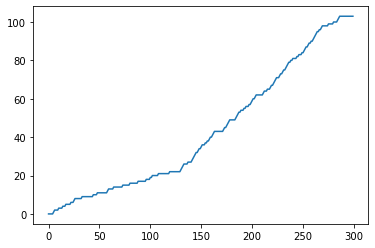

In [4]:
all_driver_wins = pd.DataFrame()

drivers = ['alonso','vettel','hamilton']

driver = 'hamilton'

driver_results = ergast_retrieve(driver)

driver_results_df = pd.DataFrame()



no_of_races = len(driver_results['RaceTable']['Races'])

for i in range(no_of_races):
    race = driver_results['RaceTable']['Races'][i]['Results']
    #print(race)
    
    race_position = race[0]['position']
    
    #print(race_position)
    
    current_race = {'race': i+1}
    
    if race_position != '1':
        current_race['win']=False
    if race_position == '1':
        current_race['win']=True

    current_race['pos'] = race_position
    
    driver_results_df = driver_results_df.append(current_race, ignore_index=True)

is_win =  driver_results_df['pos']=='1'

driver_wins = driver_results_df[is_win]
    
driver_wins['win_count'] = driver_wins.groupby('pos').cumcount() +1


driver_results_df['win_count'] = driver_wins['win_count']

driver_results_df.bfill()



#display(driver_wins)        
#display(driver_results_df)


driver_win_count = pd.DataFrame()

driver_win_count[driver] = driver_results_df['win_count']

driver_win_count.fillna(method='ffill', inplace=True)
driver_win_count.fillna(0, inplace=True)

display(driver_win_count)

fig, ax = plt.subplots()

ax.plot(driver_win_count)

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


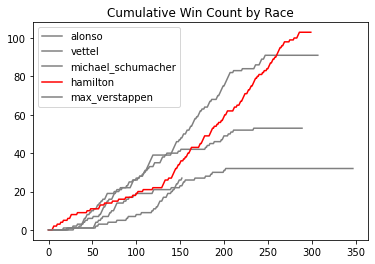

In [5]:
all_driver_wins = pd.DataFrame()

drivers = ['alonso','vettel','michael_schumacher','hamilton','max_verstappen']

fig, ax = plt.subplots()
plt.title('Cumulative Win Count by Race')


for driver in drivers:

    driver_results = ergast_retrieve(driver)

    driver_results_df = pd.DataFrame()



    no_of_races = len(driver_results['RaceTable']['Races'])

    for i in range(no_of_races):
        race = driver_results['RaceTable']['Races'][i]['Results']
    #print(race)
    
        race_position = race[0]['position']
    
    #print(race_position)
    
        current_race = {'race': i+1}
    
        if race_position != '1':
            current_race['win']=False
        if race_position == '1':
            current_race['win']=True

        current_race['pos'] = race_position
    
        driver_results_df = driver_results_df.append(current_race, ignore_index=True)

    is_win =  driver_results_df['pos']=='1'

    driver_wins = driver_results_df[is_win]
    
    driver_wins['win_count'] = driver_wins.groupby('pos').cumcount() +1


    driver_results_df['win_count'] = driver_wins['win_count']

   



    #display(driver_wins)        
    #display(driver_results_df)


    driver_win_count = pd.DataFrame()

    driver_win_count[driver] = driver_results_df['win_count']

    driver_win_count.fillna(method='ffill', inplace=True)
    driver_win_count.fillna(0, inplace=True)

    #display(driver_win_count)

    if driver == 'hamilton':
        color = 'red'
    else:
        color = 'grey'
    
    #all_driver_wins[driver] = all_driver_wins.append(driver_win_count, ignore_index=False)
    
    ax.plot(driver_win_count,color=color, label=driver)

plt.legend(loc="upper left")

In [6]:
display(all_driver_wins)

""


PODIUMS ONLY


/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,race,pos,pod,pod_count
0,1.0,3.0,1.0,1
1,2.0,2.0,1.0,2
2,3.0,2.0,1.0,3
3,4.0,2.0,1.0,4
4,5.0,2.0,1.0,5
...,...,...,...,...
288,289.0,3.0,1.0,183
296,297.0,3.0,1.0,184
297,298.0,3.0,1.0,185
298,299.0,3.0,1.0,186


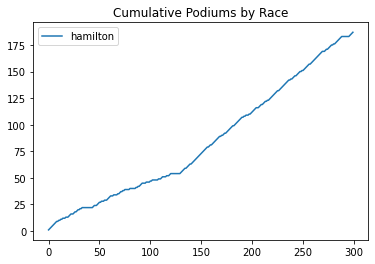

In [7]:
##### PODIUM TESTING

driver = 'hamilton'

driver_results = ergast_retrieve(driver)

driver_results_df = pd.DataFrame()

fig, ax = plt.subplots()
plt.title('Cumulative Podiums by Race')

no_of_races = len(driver_results['RaceTable']['Races'])

for i in range(no_of_races):
    race = driver_results['RaceTable']['Races'][i]['Results']
#print(race)

    race_position = int(race[0]['position'])

#print(race_position)

    current_race = {'race': i+1}
    current_race['pos'] = race_position
    
    if race_position < 4.0:
        current_race['pod']=1.0
    else:
        current_race['pod']=0.0

    driver_results_df = driver_results_df.append(current_race, ignore_index=True)

#display(driver_results_df)

is_pod =  driver_results_df['pod']==1.0

driver_pods = driver_results_df[is_pod]

driver_pods['pod_count'] = driver_pods.groupby('pod').cumcount() +1

driver_results_df['pod_count'] = driver_pods['pod_count']

       
#display(driver_results_df)

#driver_results_df['pod_count'] = driver_wins['pod_count']

driver_pod_count = pd.DataFrame()

driver_pod_count[driver] = driver_results_df['pod_count']

driver_pod_count.fillna(method='ffill', inplace=True)
driver_pod_count.fillna(0, inplace=True)

print('PODIUMS ONLY')
display(driver_pods) 

ax.plot(driver_pod_count, label=driver)
plt.legend(loc="upper left")

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


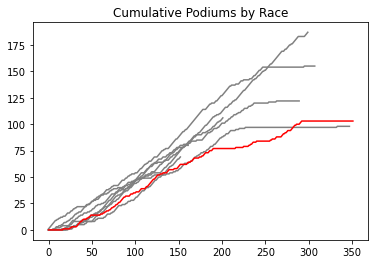

In [8]:
driver = 'hamilton'

drivers = ['prost','senna','alonso','vettel','michael_schumacher','hamilton','max_verstappen','raikkonen']


fig, ax = plt.subplots()
plt.title('Cumulative Podiums by Race')

for driver in drivers:

    driver_results = ergast_retrieve(driver)

    driver_results_df = pd.DataFrame()



    no_of_races = len(driver_results['RaceTable']['Races'])

    for i in range(no_of_races):
        race = driver_results['RaceTable']['Races'][i]['Results']
    #print(race)

        race_position = int(race[0]['position'])

    #print(race_position)

        current_race = {'race': i+1}
        current_race['pos'] = race_position

        if race_position < 4.0:
            current_race['pod']=1.0
        else:
            current_race['pod']=0.0

        driver_results_df = driver_results_df.append(current_race, ignore_index=True)

    #display(driver_results_df)

    is_pod =  driver_results_df['pod']==1.0

    driver_pods = driver_results_df[is_pod]

    driver_pods['pod_count'] = driver_pods.groupby('pod').cumcount() +1

    driver_results_df['pod_count'] = driver_pods['pod_count']


    #display(driver_results_df)

    #driver_results_df['pod_count'] = driver_wins['pod_count']

    driver_pod_count = pd.DataFrame()

    driver_pod_count[driver] = driver_results_df['pod_count']

    driver_pod_count.fillna(method='ffill', inplace=True)
    driver_pod_count.fillna(0, inplace=True)

    #print('PODIUMS ONLY')
    #display(driver_pods) 
    
    if driver == 'raikkonen':
        color = 'red'
    else:
        color = 'grey'

    ax.plot(driver_pod_count, label=driver,color=color)
#plt.legend(loc="upper left")

In [9]:
def ergast_dob(api_endpoint: str):
    url = f'http://ergast.com/api/f1/drivers/{api_endpoint}.json'
    response = requests.get(url).json()
    dob = pd.to_datetime(response['MRData']['DriverTable']['Drivers'][0]['dateOfBirth'])
    
    return dob

from dateutil.relativedelta import relativedelta


,race,pos,age,pod,pod_count
0,1.0,3.0,8105 days,1.0,1.0
1,2.0,2.0,8126 days,1.0,2.0
2,3.0,2.0,8133 days,1.0,3.0
3,4.0,2.0,8161 days,1.0,4.0
4,5.0,2.0,8175 days,1.0,5.0
...,...,...,...,...,...
295,296.0,4.0,13670 days,0.0,183.0
296,297.0,3.0,13677 days,1.0,184.0
297,298.0,3.0,13691 days,1.0,185.0
298,299.0,3.0,13698 days,1.0,186.0


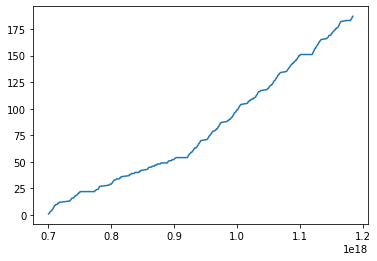

In [10]:
### Podiums by age

fig, ax = plt.subplots()

driver = 'hamilton'

driver_results = ergast_retrieve(driver)
driver_dob = ergast_dob(driver)

driver_results_df = pd.DataFrame()

no_of_races = len(driver_results['RaceTable']['Races'])

for i in range(no_of_races):
    
    race = driver_results['RaceTable']['Races'][i]['Results']
    
    race_date = pd.to_datetime(driver_results['RaceTable']['Races'][i]['date'])
    age_at_gp = race_date - driver_dob

    race_position = int(race[0]['position'])

    current_race = {'race': i+1}
    current_race['pos'] = race_position
    current_race['age'] = age_at_gp
    #print(age_at_gp)
    
    if race_position < 4.0:
        current_race['pod']=1.0
    else:
        current_race['pod']=0.0

    driver_results_df = driver_results_df.append(current_race, ignore_index=True)

#display(driver_results_df)

is_pod =  driver_results_df['pod']==1.0

driver_pods = driver_results_df[is_pod]

driver_pods['pod_count'] = driver_pods.groupby('pod').cumcount() +1

driver_results_df['pod_count'] = driver_pods['pod_count']

       
#display(driver_results_df)

#driver_results_df['pod_count'] = driver_wins['pod_count']





driver_results_df['pod_count'].fillna(method='ffill', inplace=True)
driver_results_df['pod_count'].fillna(0, inplace=True)

#print('PODIUMS ONLY')
#display(driver_pods) 

#ax.plot(driver_pod_count, label=driver)
#plt.legend(loc="upper left")
display(driver_results_df)

ax.plot(driver_results_df['age'],driver_results_df['pod_count'])


/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/anaconda3/envs/f1/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

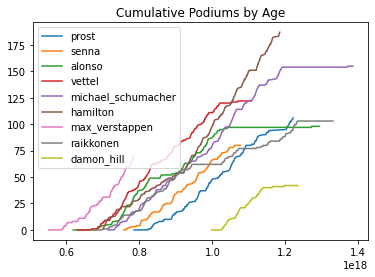

In [11]:
###### PODIUMS BY AGE


drivers = ['prost','senna','alonso','vettel','michael_schumacher','hamilton','max_verstappen','raikkonen','damon_hill']


fig, ax = plt.subplots()
plt.title('Cumulative Podiums by Age')

for driver in drivers:


    driver_results = ergast_retrieve(driver)
    driver_dob = ergast_dob(driver)

    driver_results_df = pd.DataFrame()

    no_of_races = len(driver_results['RaceTable']['Races'])

    for i in range(no_of_races):

        race = driver_results['RaceTable']['Races'][i]['Results']

        race_date = pd.to_datetime(driver_results['RaceTable']['Races'][i]['date'])
        age_at_gp = race_date - driver_dob
        
        

        race_position = int(race[0]['position'])

        current_race = {'race': i+1}
        current_race['pos'] = race_position
        current_race['age'] = age_at_gp
        #print(age_at_gp)

        if race_position < 4.0:
            current_race['pod']=1.0
        else:
            current_race['pod']=0.0

        driver_results_df = driver_results_df.append(current_race, ignore_index=True)

    #display(driver_results_df)

    is_pod =  driver_results_df['pod']==1.0

    driver_pods = driver_results_df[is_pod]

    driver_pods['pod_count'] = driver_pods.groupby('pod').cumcount() +1

    driver_results_df['pod_count'] = driver_pods['pod_count']


    #display(driver_results_df)

    #driver_results_df['pod_count'] = driver_wins['pod_count']





    driver_results_df['pod_count'].fillna(method='ffill', inplace=True)
    driver_results_df['pod_count'].fillna(0, inplace=True)

    #print('PODIUMS ONLY')
    #display(driver_pods) 

    #ax.plot(driver_pod_count, label=driver)
    #plt.legend(loc="upper left")
    #display(driver_results_df)

    ax.plot(driver_results_df['age'],driver_results_df['pod_count'], label=driver)

plt.legend(loc="upper left")